# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Описание проекта
Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.
Инструкция по выполнению проекта
Загрузите и подготовьте данные. Поясните порядок действий.
Обучите и проверьте модель для каждого региона:
2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
2.2. Обучите модель и сделайте предсказания на валидационной выборке.
2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
2.5. Проанализируйте результаты.
Подготовьтесь к расчёту прибыли:
3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
3.3. Напишите выводы по этапу подготовки расчёта прибыли.
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
4.1. Выберите скважины с максимальными значениями предсказаний.
4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
4.3. Рассчитайте прибыль для полученного объёма сырья.
Посчитайте риски и прибыль для каждого региона:
5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.
Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
/datasets/geo_data_0.csv. Скачать датасет
/datasets/geo_data_1.csv. Скачать датасет
/datasets/geo_data_2.csv. Скачать датасет
id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).
Условия задачи:
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


In [6]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    data_0 = pd.read_csv('C:/Users/анатолий/Documents/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('C:/Users/анатолий/Documents/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('C:/Users/анатолий/Documents/datasets/geo_data_2.csv')

In [8]:
data_0 = data_0.drop('id',axis=1)
display(data_0.head())
data_0.info()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [4]:
data_1 = data_1.drop('id',axis=1)
display(data_1.head())
data_1.info()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [5]:
data_2 = data_2.drop('id',axis=1)
display(data_2.head())
data_2.info()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


Удалили столбец с id скважины,пропуски не обнаружены,данные готовы к анализу задач проекта
Напишем функцию визуализации корреляций между признаками и целевой переменной проекта

In [6]:
def plotting_corr(data):
    '''Функция визуализации корреляций'''
           
    sns_plot = sns.pairplot(data[['f0','f1','f2','product']]);
    f, ax = plt.subplots()
    sns.set(font_scale=1.3)
    cols = ['f0','f1','f2','product']
    
# строим тепловую карту корреляции признаков с целевой переменной    
    cm = np.corrcoef(data[cols].values.T)
    sns.heatmap(cm,annot=True, ax=ax, cmap="viridis");
    
    ax.set_xticklabels(['f0','f1','f2','product'])    
    ax.set_yticklabels(['f0','f1','f2','product'])
    ax.set_title('Тепловая карта корреляционной матрицы региона');
    plt.show()
    
#  нарисуем распределение запасов в регионе    
    sns.boxplot(x = 'product',data=data,color='red');
    plt.show()

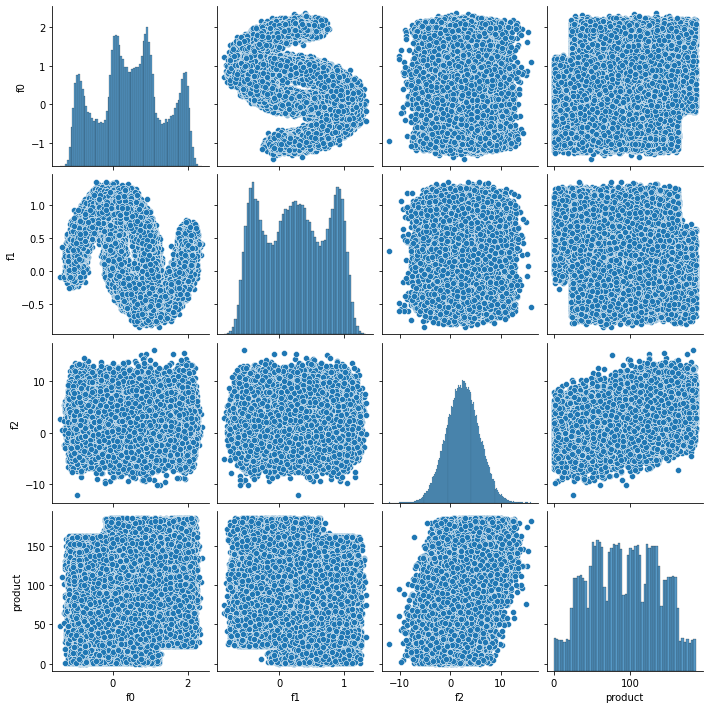

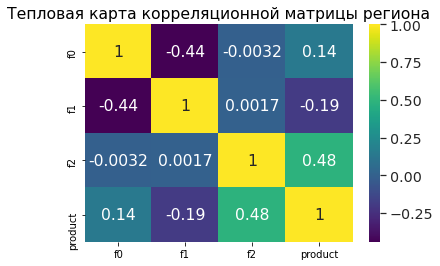

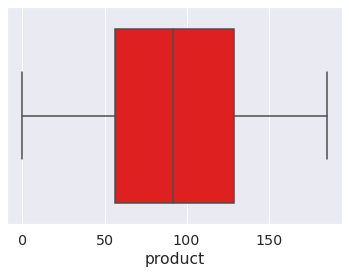

In [7]:
# визуализация признаков,тепловой карты корреляций признаков и распределение запасов нефти РЕГИОНА_0
plotting_corr(data_0)

Для первого региона признак f2 имеет коэффициент корреляции 0.48 остальные два показываю слабую связь с целевой переменной.
Запасы нефти с медианой около 87 тыс.баррелей
Видим замысловатые зависимости в переменных признаков- нет смысла анализировать ведь данные синтетические.

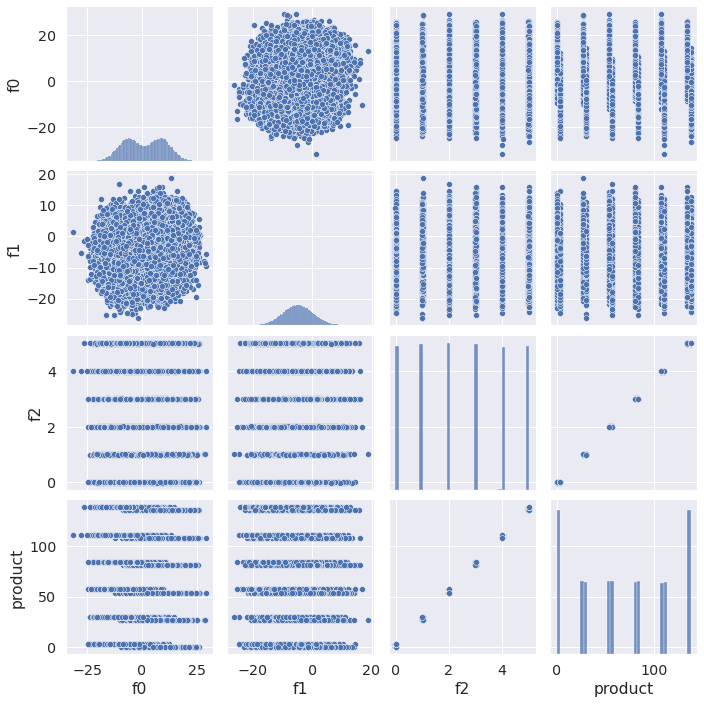

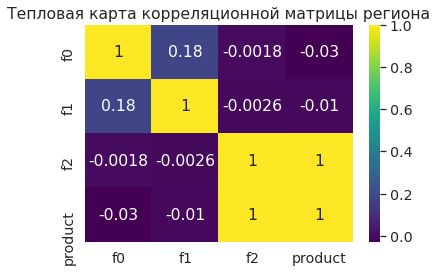

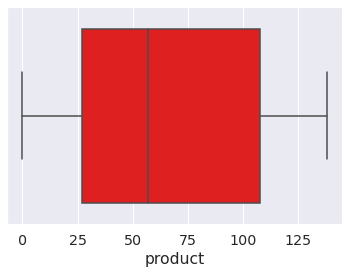

In [8]:
# визуализация признаков,тепловой карты корреляций признаков и распределение запасов нефти РЕГИОНА_1
plotting_corr(data_1)

Здесь признак f2 линейно определяет целевую переменную - скорее модель будет переучена,медианные запасу меньше но их разброс побольше,чем в первом регионе.

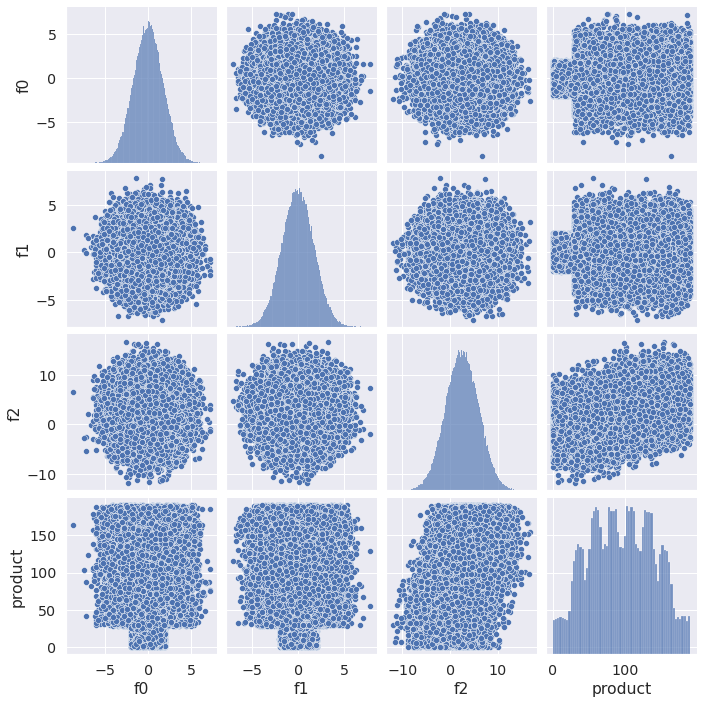

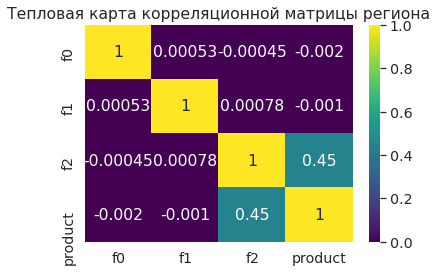

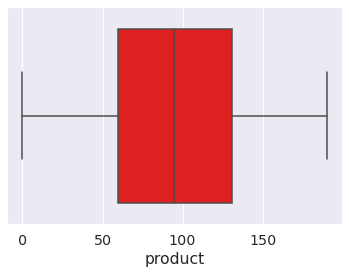

In [9]:
# визуализация признаков,тепловой карты корреляций признаков и распределение запасов нефти РЕГИОНА_2
plotting_corr(data_2)

Ничего заметно отличающегося от первого региона не обнаружено,разве что f0 и f1 вообще не коррелируют с целевой переменной

## Обучение и проверка модели

In [10]:
# расчет констант и минимального запаса для рентабельной работы скважин

BUDGET = 10000000000     # суммарный бюджет разработки всех скважин в одном регионе
PRICE = 450*1000  # стоимость тысяци баррелей нефти
STOCK_OIL = BUDGET/PRICE/200 #    безубыточный запас скважины из 200
print('Минимальный рентабельный запас в скважине: {:.1f}'.format(STOCK_OIL))

Минимальный рентабельный запас в скважине: 111.1


Из задания не совсем ясно эти 10 млрд все ушли на разработку 10000 скважин или на 200 по которым я посчитал запас рентабельности одной скважины - от этого зависят все финансовые показатели. Одним словом посчитано как я понял задачу и запас нефти для рентабельной работы одной скважины равен 111 тысяч баррелей. Далее считаем по предсказанным данным в увязке с индексами реальных тестовых данных значения суммарных прибылей по каждому из регионов.

In [11]:
def regression(data):
    '''Функция для расчета метрик LinearRegression 
           и предсказания средних запасов нефти'''
# разделим выборку на тренировочную и валидационную     
    features = data.drop(['product'],axis=1)
    target = data['product']
    features_train,features_valid,target_train,target_valid =\
                                                     train_test_split(features,target,\
                                                        test_size = 0.25,random_state = 12345)
# обучим линейную модель    
    model_data = LinearRegression()
    model_data.fit(features_train,target_train)
    pred_data = model_data.predict(features_valid)# предсказание на валидационной
    predictions_train = model_data.predict(features_train)# предсказания на тренировочной
    mse = mean_squared_error(target_valid, pred_data)
    mean_data = pred_data.mean()
    mean_real = target_valid.mean()
    
# расчет прибыли для 200 лучших скважин    
    probab = pd.Series(pred_data,index=target_valid.index)
    sample_probs = probab.sample(n=500,replace=True,random_state = 12345)
    probs_sorted = sample_probs.sort_values(ascending=False)
    selected = target_valid[probs_sorted.index].head(200)
    predict_revenue = selected.sum() * PRICE
    net_revenue_pred = predict_revenue - BUDGET
    
# расчет прибыли для 200 лучших скважин методом Bootstrap    
    
    state = np.random.RandomState(12345)
    values = []
    count_val = 0
    for i in range(1000):
        
        probab_boot = pd.Series(pred_data,index=target_valid.index)
        sample_probs_boot = probab_boot.sample(n=500, replace=True,random_state = state)
        probs_sorted_boot = sample_probs_boot.sort_values(ascending=False)
        selected_boot = target_valid[probs_sorted_boot.index][:200]
        predict_revenue_boot = selected_boot.sum() * PRICE
        net_revenue_pred_boot = predict_revenue_boot - BUDGET
        values.append(net_revenue_pred_boot)
        
    for val in values:
        if val <= 0:
            count_val += 1
        
    values = pd.Series(values)
    values_95 = values.quantile(0.95) 
    
    risk_val = count_val/ 1000*100
    mean = values_95.mean()
     
    
    
    
#   вычисляем веса признаков    
    coeff = model_data.coef_
    
    return  mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,\
features,net_revenue_pred,mean,risk_val,values   

In [12]:
print('РЕГИОН data_0\n')

mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                     net_revenue_pred,mean,risk_val,values = regression(data_0)
print("Реальный средний запас на valid выборке: {:.3f}".format(mean_real))
print("Предсказанный средний запас на valid выборке: {:.3f}".format(mean_data),'\nRMSE = {:.3f}'.format(mse**0.5)\
                                                         ,'\nMSE = {:.3f}'.format(mse))
print("R2 = {:.3f}".format(r2_score(target_valid,pred_data)))
print("MAE на обучающей выборке: {:.3f}".format( mean_absolute_error(target_train,predictions_train)))
print("MAE на валидационной выборке:{:.3f}".format(mean_absolute_error(target_valid,pred_data)))
print()
print('Суммарная предсказанная прибыль региона от 200 скважин,руб: {:.1f}'.format(net_revenue_pred))

РЕГИОН data_0

Реальный средний запас на valid выборке: 92.079
Предсказанный средний запас на valid выборке: 92.593 
RMSE = 37.579 
MSE = 1412.213
R2 = 0.280
MAE на обучающей выборке: 31.080
MAE на валидационной выборке:30.920

Суммарная предсказанная прибыль региона от 200 скважин,руб: 605464074.6


Численные веса признаков [  3.59280585 -14.09794419   6.59316617]


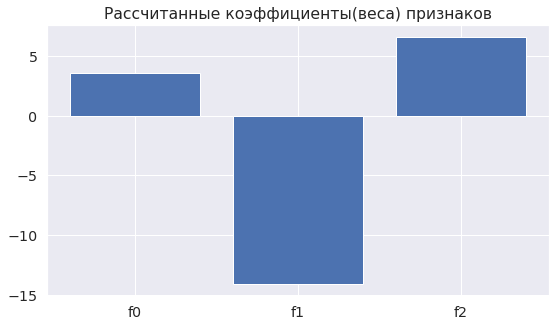

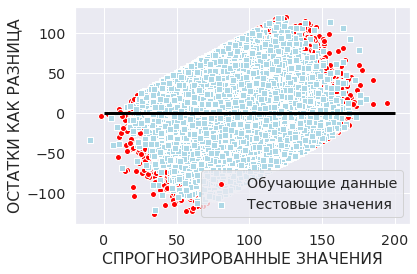

In [13]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                     net_revenue_pred,mean,risk_val,values = regression(data_0)

print('Численные веса признаков',coeff)
plt.figure(figsize=(9,5));
plt.bar(features.columns,coeff);
plt.xticks(rotation=0);
plt.grid(True);
plt.title('Рассчитанные коэффициенты(веса) признаков');
plt.show()

 # строим график остатков
plt.scatter(predictions_train,predictions_train-target_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(pred_data,pred_data-target_valid,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=200,color='black',lw=3)
plt.show()

Средний запас нефти  скважин в первом регионе рассчитанный по предсказаниям модели и на валидационной выборке отличается на 0,55%.
МАЕ на обучающей выборке и на валидационной выборке близки,что скорее показывает об адекватности модели,но
RMSE равный 37.6 и R2 = 0.279 показывает не очень хорошую "предсказательность" модели на этих данных в смысле захвата моделью
всех объясняющих переменных датасета. 

In [14]:
print('РЕГИОН data_1\n')

mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                                                  net_revenue_pred,mean,risk_val,values = regression(data_1)
print("Реальный средний запас на valid выборке: {:.3f}".format(mean_real))
print("Предсказанный средний запас на valid выборке: {:.3f}".format(mean_data),'\nRMSE = {:.3f}'.format(mse**0.5)\
                                                         ,'\nMSE = {:.3f}'.format(mse))
print("R2 = {:.3f}".format(r2_score(target_valid,pred_data)))
print("MAE на обучающей выборке: {:.3f}".format( mean_absolute_error(target_train,predictions_train)))
print("MAE на валидационной выборке:{:.3f}".format(mean_absolute_error(target_valid,pred_data)))
print()
print('Суммарная предсказанная прибыль региона от 200 скважин,руб: {:.1f}'.format(net_revenue_pred))



РЕГИОН data_1

Реальный средний запас на valid выборке: 68.723
Предсказанный средний запас на valid выборке: 68.729 
RMSE = 0.893 
MSE = 0.798
R2 = 1.000
MAE на обучающей выборке: 0.717
MAE на валидационной выборке:0.719

Суммарная предсказанная прибыль региона от 200 скважин,руб: 228016163.5


Численные веса признаков [-1.44940967e-01 -2.20278542e-02  2.69511805e+01]


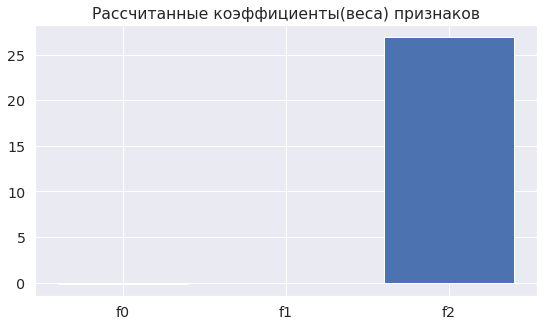

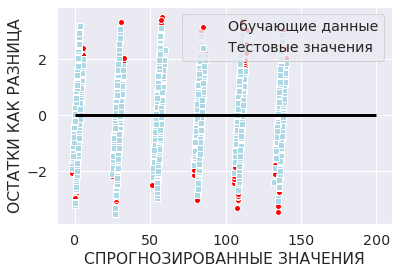

In [15]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                                                  net_revenue_pred,mean,risk_val,values = regression(data_1)

print('Численные веса признаков',coeff)
plt.figure(figsize=(9,5));
plt.bar(features.columns,coeff);
plt.xticks(rotation=0);
plt.grid(True);
plt.title('Рассчитанные коэффициенты(веса) признаков');
plt.show()

 # строим график остатков
plt.scatter(predictions_train,predictions_train-target_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(pred_data,pred_data-target_valid,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=200,color='black',lw=3)
plt.show()

Так как данные этого региона специфичны,то и результат предсказаний специфичен в своей точности - модель скорее переучена,так как признаком этого является R2 почти равная единице и такая вот периодичность захвата объясняющих переменных.
Но такие данные этого датасета.

In [16]:
print('РЕГИОН data_2\n')

mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                                                  net_revenue_pred,mean,risk_val,values = regression(data_2)
print("Реальный средний запас на valid выборке: {:.3f}".format(mean_real))
print("Предсказанный средний запас на valid выборке: {:.3f}".format(mean_data),'\nRMSE = {:.3f}'.format(mse**0.5)\
                                                         ,'\nMSE = {:.3f}'.format(mse))
print("R2 = {:.3f}".format(r2_score(target_valid,pred_data)))
print("MAE на обучающей выборке: {:.3f}".format( mean_absolute_error(target_train,predictions_train)))
print("MAE на валидационной выборке:{:.3f}".format(mean_absolute_error(target_valid,pred_data)))
print()
print('Суммарная предсказанная прибыль региона от 200 скважин,руб: {:.1f}'.format(net_revenue_pred))


РЕГИОН data_2

Реальный средний запас на valid выборке: 94.884
Предсказанный средний запас на valid выборке: 94.965 
RMSE = 40.030 
MSE = 1602.378
R2 = 0.205
MAE на обучающей выборке: 32.839
MAE на валидационной выборке:32.793

Суммарная предсказанная прибыль региона от 200 скважин,руб: -71899228.2


Численные веса признаков [ 0.03093573 -0.04187719  5.70854243]


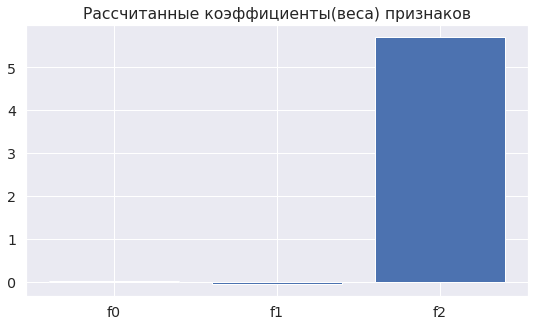

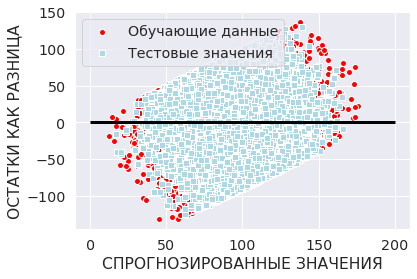

In [17]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                                                  net_revenue_pred,mean,risk_val,values = regression(data_2)

print('Численные веса признаков',coeff)
plt.figure(figsize=(9,5));
plt.bar(features.columns,coeff);
plt.xticks(rotation=0);
plt.grid(True);
plt.title('Рассчитанные коэффициенты(веса) признаков');
plt.show()

 # строим график остатков
plt.scatter(predictions_train,predictions_train-target_train,
           c='red',marker='o',edgecolor='white',
           label='Обучающие данные')
plt.scatter(pred_data,pred_data-target_valid,
           c='lightblue',marker='s',edgecolor='white',
           label='Тестовые значения')
plt.xlabel('СПРОГНОЗИРОВАННЫЕ ЗНАЧЕНИЯ')
plt.ylabel('ОСТАТКИ КАК РАЗНИЦА')
plt.legend(loc='best')
plt.hlines(y=0,xmin=0,xmax=200,color='black',lw=3)
plt.show()

В этом регионе и средние запасы побольше но и модель не все объясняющие переменные признаков захватывает в обработку.

Итак по трем регионам видим такие результаты:

1. РЕГИОН data_0
Реальный средний запас на valid выборке: 92.079
Предсказанный средний запас на valid выборке: 92.593 
RMSE = 37.579 
MSE = 1412.213
R2 = 0.280
MAE на обучающей выборке: 31.080
MAE на валидационной выборке:30.920

Суммарная предсказанная прибыль региона от 200 скважин,руб: 605464074.6

2. РЕГИОН data_1
Реальный средний запас на valid выборке: 68.723
Предсказанный средний запас на valid выборке: 68.729 
RMSE = 0.893 
MSE = 0.798
R2 = 1.000
MAE на обучающей выборке: 0.717
MAE на валидационной выборке:0.719

Суммарная предсказанная прибыль региона от 200 скважин,руб: 228016163.5

3. РЕГИОН data_2

Реальный средний запас на valid выборке: 94.884
Предсказанный средний запас на valid выборке: 94.965 
RMSE = 40.030 
MSE = 1602.378
R2 = 0.205
MAE на обучающей выборке: 32.839
MAE на валидационной выборке:32.793

Суммарная предсказанная прибыль региона от 200 скважин,руб: -71899228.2

В лидерах регион_0 с суммарной прибылью от 200 скважин 605 млн.рублей
Регион_2 показал убыток в 72 млн.рублей.

По итогам предсказаний модели выбираем как наиболее прибыльный Регион_0.

## Подготовка к расчёту прибыли

Перед тем как приступить к следующему рассчету прибылей некоторые соображения как "если бы я был директор".
Итак про предсказания забываем и использунм технику бутстрап по всем 100 тысячам скважин.
Я потратил 10 млрд.рублей и пробурил 100 тыс.скважин - себестоимость одной скважины равна 100 тысяч рублей
Моих ресурсов хватит на установку лишь 200 буровых вышек и я хочу просчитать прибыль от них и потом уже планировать или срок 
окупаемости вложенных средств с определением дополнительных вышек для добычи - это уже другой бизнес-план и не входит в этот проект.Поэтому я беру рассчетным путем  500 скважин и методом случайных выборок смотрю результат для 200 скважин.


## Расчёт прибыли и рисков 

In [18]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                     net_revenue_pred,mean,risk_val,values = regression(data_0)
print('РЕГИОН data_0\n')
print("Усредненная суммарная прибыль от 200 скважин региона data_0, руб: {:.1f}".format(mean))
print('Процент убыточных скважин: {:.1f}'.format(risk_val))
print('Квантиль 0.025:', values.quantile(0.025))
print('Квантиль 0.975:', values.quantile(0.975))

РЕГИОН data_0

Усредненная суммарная прибыль от 200 скважин региона data_0, руб: 842688161.1
Процент убыточных скважин: 6.9
Квантиль 0.025: -111215545.89049526
Квантиль 0.975: 909766941.5534226


In [19]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                     net_revenue_pred,mean,risk_val,values = regression(data_1)
print('РЕГИОН data_1\n')
print("Усредненная суммарная прибыль от 200 скважин региона data_1, руб: {:.1f}".format(mean))
print('Процент убыточных скважин: {:.1f}'.format(risk_val))
print('Квантиль 0.025:', values.quantile(0.025))
print('Квантиль 0.975:', values.quantile(0.975))

РЕГИОН data_1

Усредненная суммарная прибыль от 200 скважин региона data_1, руб: 791005513.3
Процент убыточных скважин: 1.5
Квантиль 0.025: 33820509.39898363
Квантиль 0.975: 852289453.866036


In [20]:
mean_data,mean_real,pred_data,predictions_train, mse,target_valid,target_train,coeff,features,\
                                     net_revenue_pred,mean,risk_val,values = regression(data_2)
print('РЕГИОН data_2\n')
print("Усредненная суммарная прибыль от 200 скважин региона data_2, руб: {:.1f}".format(mean))
print('Процент убыточных скважин: {:.1f}'.format(risk_val))
print('Квантиль 0.025:', values.quantile(0.025))
print('Квантиль 0.975:', values.quantile(0.975))

РЕГИОН data_2

Усредненная суммарная прибыль от 200 скважин региона data_2, руб: 841123996.7
Процент убыточных скважин: 7.6
Квантиль 0.025: -163350413.39560106
Квантиль 0.975: 950359574.9237995


КОММЕНТАРИЙ СТУДЕНТА:
Рассчет прибыли по бутстрепу перенес в общую функцию и увязал с предсказанием модели.
Изначально хотел посмотреть как работает бутстреп сам по себе,но логично согласен увязать с прогнозом.
А процент этих скважин - забыл стереть после экспериментирования с рассчетами.

Итак получены результаты:

1. РЕГИОН data_0

Усредненная суммарная прибыль от 200 скважин региона data_0, руб: 842688161.1
Процент убыточных скважин: 6.9
Квантиль 0.025: -111215545.89049526
Квантиль 0.975: 909766941.553422

2. РЕГИОН data_1

Усредненная суммарная прибыль от 200 скважин региона data_1, руб: 791005513.3
Процент убыточных скважин: 1.5
Квантиль 0.025: 33820509.39898363
Квантиль 0.975: 852289453.866036

3. РЕГИОН data_2

Усредненная суммарная прибыль от 200 скважин региона data_2, руб: 841123996.7
Процент убыточных скважин: 7.6
Квантиль 0.025: -163350413.39560106
Квантиль 0.975: 950359574.9237995


По итогам рассчетов для дальнейшей разработки запасов нефти выбираем РЕГИОН data_1 
с усредненной суммарной прибылью от 200 скважин 791 млн.рублей и с процентом убыточных скважин равным 1.5%.


          ОБЩИЙ ВЫВОД ПРОЕКТА.
После анализа данных на пригодность их к использованию рассчитаны и визуализированы корреляции признаков,весовые коэффициенты,
тепловые карты корреляций признаков,статистические результаты запасов нефти по трем регионам.
Обучена модель линейной регрессии с целью предсказания средних запасов нефти в скважине и вычислены метрики этих результатов.
на основании их выбран второй регион для дальнейшей разработки месторождений.
Сделаны необходимые выводы.
Методом бутстрепа произведены рассчеты суммарных прибылей для трех регионов и рекомендован второй регион для перспективной
разработки.
Не очень понятно сформулирована задача выбора прибыльных месторождений поэтому сформулировал свое видение решения задачи.

